# Etapa 3: Análise, Interpretação e Visualização dos Dados
Os dados utilizados nesse notebook foram coletados diretamente da API TMDB e foram disponibilizados no formato CSV.




#### Importando as bibliotecas

In [ ]:
#Manipulação de Dados
import pandas as pd
import numpy as np

#Visualização de Dados
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#### Carregando conjunto de dados

In [ ]:
df = pd.read_csv("df_final.csv")

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5310,100000000,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://family.foxmovies.com/movies/spies-in-d...,431693,"[{'id': 470, 'name': 'spy'}, {'id': 1436, 'nam...",en,Spies in Disguise,Super spy Lance Sterling and scientist Walter ...,47.626,"[{'id': 7076, 'logo_path': '/8BFxn9NUWSgp0ndih...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-04,171616764,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Super Spy. Super Fly.,Spies in Disguise,7.7,2082,"[{'adult': False, 'gender': 2, 'id': 2888, 'kn...","[{'adult': False, 'gender': 1, 'id': 611, 'kno..."
5311,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.littlewomen.movie/,331482,"[{'id': 242, 'name': 'new york city'}, {'id': ...",en,Little Women,Four sisters come of age in America in the aft...,61.521,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-25,216601214,NaN,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Own your story,Little Women,7.9,4178,"[{'adult': False, 'gender': 1, 'id': 36592, 'k...","[{'adult': False, 'gender': 2, 'id': 376, 'kno..."
5312,100000000,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://www.1917.movie/,530915,"[{'id': 2504, 'name': 'world war i'}, {'id': 4...",en,1917,"At the height of the First World War, two youn...",42.110,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2019-12-25,374733942,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Time is the enemy,1917,8.0,8791,"[{'adult': False, 'gender': 2, 'id': 146750, '...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
5313,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.justmercyfilm.net/,522212,"[{'id': 934, 'name': 'judge'}, {'id': 6139, 'n...",en,Just Mercy,The powerful true story of Harvard-educated la...,16.463,"[{'id': 32555, 'logo_path': None, 'name': 'Net...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-25,50401502,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has its hero. Meet ours.,Just Mercy,8.0,1483,"[{'adult': False, 'gender': 2, 'id': 135651, '...","[{'adult': False, 'gender': 0, 'id': 297, 'kno..."
5314,0,"[{'id': 18, 'name': 'Drama'}]",NaN,565307,"[{'id': 378, 'name': 'prison'}, {'id': 2501, '...",en,Clemency,Years of carrying out death row executions hav...,5.527,"[{'id': 112399, 'logo_path': '/plWc00ADe9sk3sr...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-27,309776,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Murder: How do we feel about it?,Clemency,6.6,56,"[{'adult': False, 'gender': 1, 'id': 1981, 'kn...","[{'adult': False, 'gender': 1, 'id': 1981, 'kn..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5315 non-null   int64  
 1   genres                5315 non-null   object 
 2   homepage              2119 non-null   object 
 3   id                    5315 non-null   int64  
 4   keywords              5315 non-null   object 
 5   original_language     5315 non-null   object 
 6   original_title        5315 non-null   object 
 7   overview              5312 non-null   object 
 8   popularity            5315 non-null   float64
 9   production_companies  5315 non-null   object 
 10  production_countries  5315 non-null   object 
 11  release_date          5314 non-null   object 
 12  revenue               5315 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5315 non-null   object 
 15  status               

#### Informações Estatísticas

In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.315000e+03,5315.000000,5315.000000,5.315000e+03,4801.000000,5315.000000,5315.000000
mean,2.912259e+07,94536.346754,25.145713,8.444125e+07,106.875859,6.133471,809.847601
std,4.181870e+07,146424.175782,84.405936,1.749604e+08,22.611935,1.184783,1524.037985
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.375000e+05,9465.000000,5.260325,0.000000e+00,94.000000,5.600000,61.000000
50%,1.400000e+07,18777.000000,13.715715,1.819561e+07,103.000000,6.300000,269.000000
75%,4.000000e+07,96722.500000,28.971113,9.129921e+07,118.000000,6.900000,852.000000
max,3.800000e+08,874948.000000,3799.665000,2.797801e+09,338.000000,10.000000,22907.000000


In [ ]:
df.describe(include="O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5315,2119,5315,5315,5315,5312,5315,5315,5314,5315,5315,4405,5315,5315,5315
unique,1448,2089,4697,37,5294,5302,4185,560,3597,643,3,4371,5287,5269,5284
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Truth or Dare,The defiant leader Moses rises up against the ...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Child's Play,[],[]
freq,370,4,442,5001,2,2,361,2977,10,3171,5307,4,2,44,29


#### Dicionário de Dados

In [ ]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

*   **budget**: Orçamento do Filmes em Dólares
*   **genres**: Lista de Dicionários com todos os gêneros associados ao filme
*   **homepage**: Site oficial do filme
*   **id**: Identificação (ID) do filme
*   **keywords**: Palavras chaves associadas ao filme
*   **original_language**: Idioma original do filme
*   **original_title**: Título original do filme
*   **overview**: Breve descrição do filme
*   **popularity**: Pontuação dada pelo TMDB
*   **production_companies**: Produtoras envolvidas na produção do filme
*   **release_data**: Data de Lançamento do Filme
*   **revenue**: Receita Total do filme em dólares
*   **runtime**: Tempo de execução do filme em minutos
*   **spoken_language**: Idiomas falados no filme
*   **status**: Status do filme (lançado, para ser lançado, anunciado, etc)
*   **tagline**: Tagline do filme
*   **title**: Título oficial do filme
*   **vote_average**: Avaliação média do filme
*   **vote_count**: Número de votos contabilizados pelo TMDB
*   **cast**: Elenco do filme
*   **crew**: Equipe Técnica



#### Dados Faltantes

In [ ]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3196
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                  514
spoken_languages           0
status                     0
tagline                  910
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

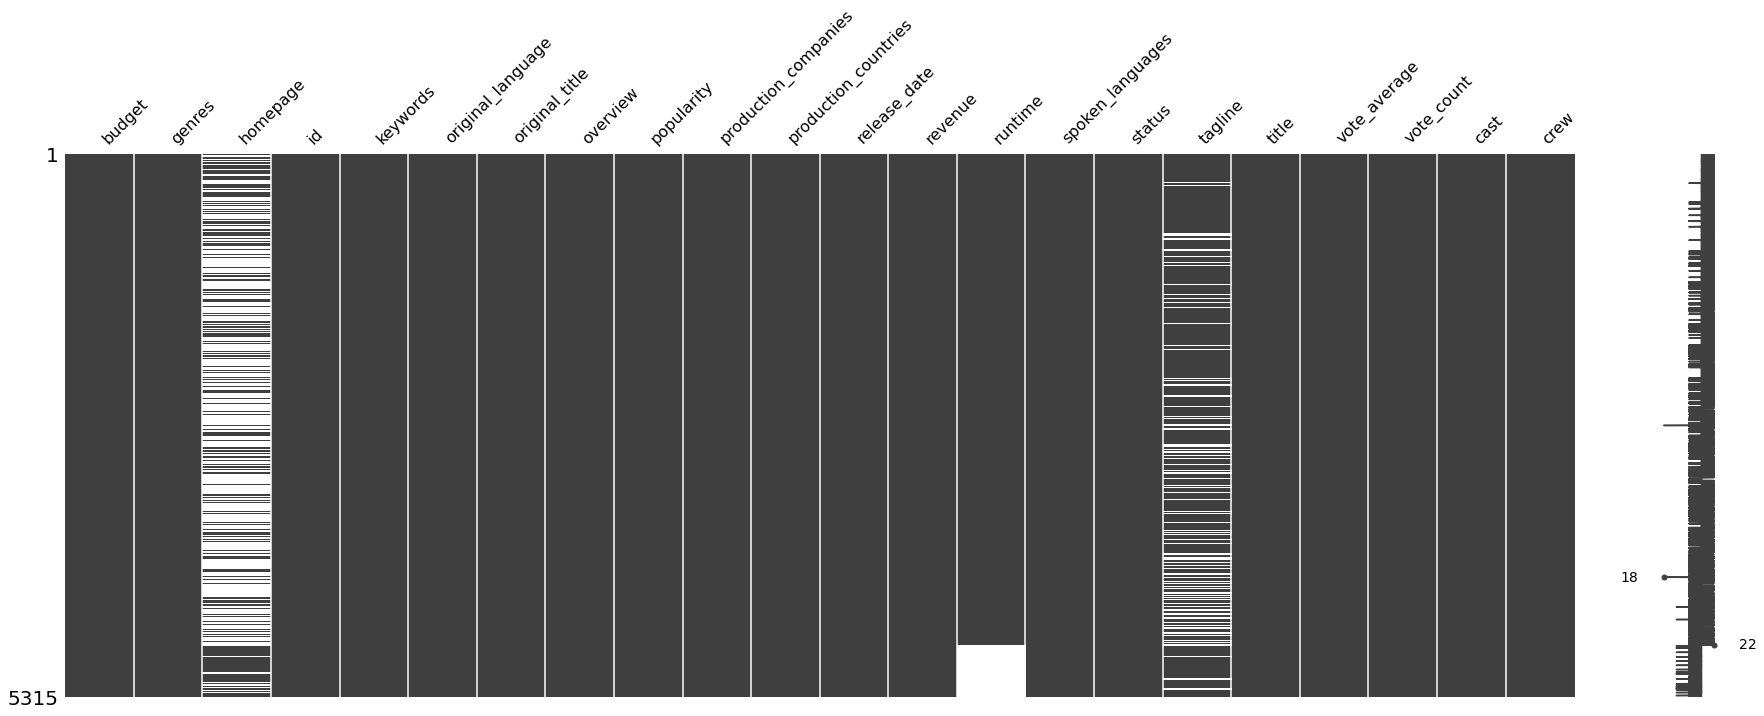

In [ ]:
missingno.matrix(df, figsize=(30,10))

In [ ]:
df.isnull().sum().sort_values(ascending=False)

homepage                3196
tagline                  910
runtime                  514
overview                   3
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,"[{""cast_id"": 3, ""character"": ""Superman / Clark...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de..."
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,"[{""cast_id"": 1, ""character"": ""Prince Caspian"",...","[{""credit_id"": ""55a239e69251412979002e8b"", ""de..."
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...","[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,"[{""cast_id"": 5, ""character"": ""Ann Darrow"", ""cr...","[{""credit_id"": ""52fe422ec3a36847f800a1d7"", ""de..."
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,"[{""cast_id"": 3, ""character"": ""Lieutenant Alex ...","[{""credit_id"": ""52fe469ec3a36847f8108d45"", ""de..."
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,"[{""cast_id"": 4, ""character"": ""Logan / Wolverin...","[{""credit_id"": ""538d82720e0a26670e005e83"", ""de..."


In [ ]:
df.shape

(5315, 22)

In [ ]:
type(df.shape)

tuple

In [ ]:
linhas, colunas = df.shape

In [ ]:
print(linhas)

5315


In [ ]:
print(colunas)

22


In [ ]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

In [ ]:
print(faltantes_percentual)

budget                   0.000000
genres                   0.000000
homepage                60.131703
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.056444
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.018815
revenue                  0.000000
runtime                  9.670743
spoken_languages         0.000000
status                   0.000000
tagline                 17.121355
title                    0.000000
vote_average             0.000000
vote_count               0.000000
cast                     0.000000
crew                     0.000000
dtype: float64


#### Dados Duplicados

In [ ]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


Vamos começar a avaliar cada Feature

#### budget: Orçamento do Filmes em Dólares

In [ ]:
df["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [ ]:
type(df["budget"])

pandas.core.series.Series

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df["budget"].dtypes

dtype('int64')

In [ ]:
df["budget"].describe().round(2)

count    5.315000e+03
mean     2.912259e+07
std      4.181870e+07
min      0.000000e+00
25%      2.375000e+05
50%      1.400000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [ ]:
df['budget'].min()

0

In [ ]:
df['budget'].max()

380000000

In [ ]:
df['budget'].std()

41818697.72772996

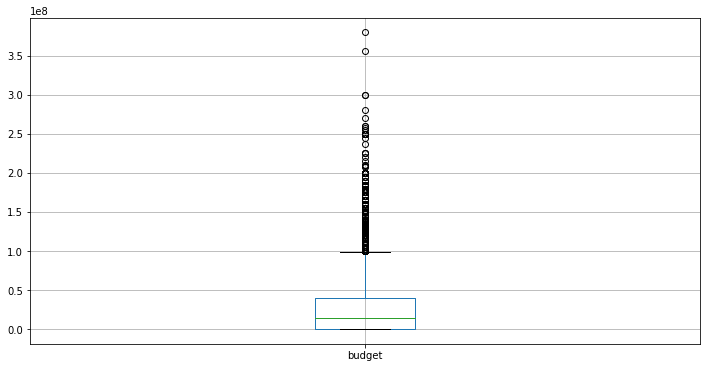

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('budget')
plt.show()

#### **genres**: Lista de Dicionários com todos os gêneros associados ao filme

In [ ]:
df["genres"].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [ ]:
type(df["genres"])

pandas.core.series.Series

In [ ]:
df["genres"].dtypes

dtype('O')

In [ ]:
#df["genres"].info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5315 non-null   int64  
 1   genres                5315 non-null   object 
 2   homepage              2119 non-null   object 
 3   id                    5315 non-null   int64  
 4   keywords              5315 non-null   object 
 5   original_language     5315 non-null   object 
 6   original_title        5315 non-null   object 
 7   overview              5312 non-null   object 
 8   popularity            5315 non-null   float64
 9   production_companies  5315 non-null   object 
 10  production_countries  5315 non-null   object 
 11  release_date          5314 non-null   object 
 12  revenue               5315 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5315 non-null   object 
 15  status               

#### **homepage**: Site oficial do filme

In [ ]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

In [ ]:
df["homepage"].dtypes

dtype('O')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

homepage                3196
tagline                  910
runtime                  514
overview                   3
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

#### id: Identificação (ID) do filme

In [ ]:
df["id"].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [ ]:
df["id"].dtypes

dtype('int64')

In [ ]:
df["id"].describe()

count      5315.000000
mean      94536.346754
std      146424.175782
min           5.000000
25%        9465.000000
50%       18777.000000
75%       96722.500000
max      874948.000000
Name: id, dtype: float64

#### keywords: Palavras chaves associadas ao filme

In [ ]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

In [ ]:
df["keywords"].dtypes

dtype('O')

#### original_language: Idioma original do filme

In [ ]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [ ]:
df["original_language"].nunique()

37

In [ ]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

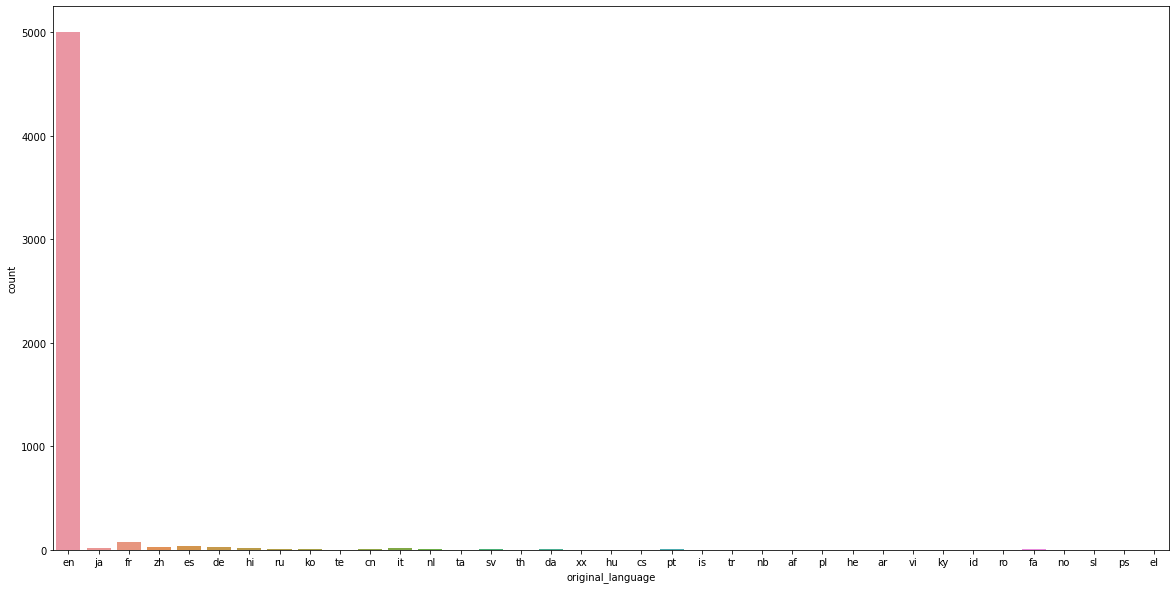

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = "original_language", data=df)
plt.show()

In [ ]:
df["original_language"].value_counts()

en    5001
fr      73
es      36
zh      28
de      28
ja      20
hi      19
it      14
cn      12
ru      11
ko      11
pt      10
da       7
sv       5
nl       4
fa       4
ar       3
he       3
th       3
ta       2
tr       2
cs       2
ro       2
id       2
vi       1
ps       1
hu       1
xx       1
sl       1
el       1
ky       1
af       1
te       1
is       1
pl       1
nb       1
no       1
Name: original_language, dtype: int64

In [ ]:
df["original_language"].describe()

count     5315
unique      37
top         en
freq      5001
Name: original_language, dtype: object

#### original_title: Título original do filme

In [ ]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [ ]:
df["original_title"].dtypes

dtype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5315 non-null   int64  
 1   genres                5315 non-null   object 
 2   homepage              2119 non-null   object 
 3   id                    5315 non-null   int64  
 4   keywords              5315 non-null   object 
 5   original_language     5315 non-null   object 
 6   original_title        5315 non-null   object 
 7   overview              5312 non-null   object 
 8   popularity            5315 non-null   float64
 9   production_companies  5315 non-null   object 
 10  production_countries  5315 non-null   object 
 11  release_date          5314 non-null   object 
 12  revenue               5315 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5315 non-null   object 
 15  status               

In [ ]:
df["original_title"].nunique()

5294

In [ ]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., '1917', 'Just Mercy', 'Clemency'], dtype=object)

In [ ]:
df["original_title"].count()

5315

In [ ]:
df["original_title"].describe()

count              5315
unique             5294
top       Truth or Dare
freq                  2
Name: original_title, dtype: object

#### overview: Breve descrição do filme

In [ ]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
df["overview"].nunique()

5302

In [ ]:
df["overview"].shape

(5315,)

In [ ]:
df["overview"].describe()

count                                                  5312
unique                                                 5302
top       The defiant leader Moses rises up against the ...
freq                                                      2
Name: overview, dtype: object

In [ ]:
df["overview"].dtypes

dtype('O')

#### popularity: Pontuação dada pelo TMDB

In [ ]:
df["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [ ]:
df["popularity"].dtypes

dtype('float64')

In [ ]:
df["popularity"].describe()

count    5315.000000
mean       25.145713
std        84.405936
min         0.000000
25%         5.260325
50%        13.715715
75%        28.971113
max      3799.665000
Name: popularity, dtype: float64

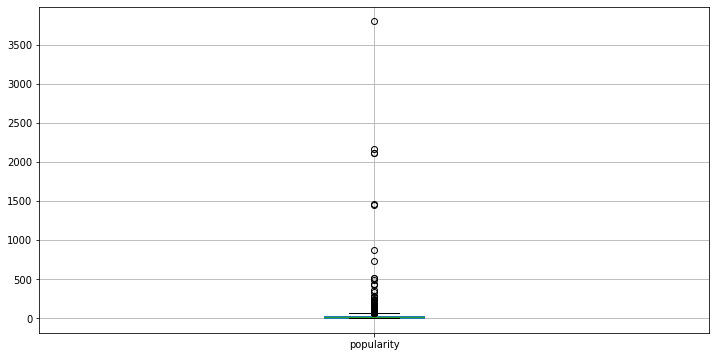

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot('popularity')
plt.show()

#### production_companies: Produtoras envolvidas na produção do filme

In [ ]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

In [ ]:
df["production_companies"].dtypes

dtype('O')

In [ ]:
df["production_companies"].describe()

count     5315
unique    4185
top         []
freq       361
Name: production_companies, dtype: object

#### release_data: Data de Lançamento do Filme

In [ ]:
df["release_date"].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [ ]:
df["release_date"].dtypes

dtype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5315 non-null   int64  
 1   genres                5315 non-null   object 
 2   homepage              2119 non-null   object 
 3   id                    5315 non-null   int64  
 4   keywords              5315 non-null   object 
 5   original_language     5315 non-null   object 
 6   original_title        5315 non-null   object 
 7   overview              5312 non-null   object 
 8   popularity            5315 non-null   float64
 9   production_companies  5315 non-null   object 
 10  production_countries  5315 non-null   object 
 11  release_date          5314 non-null   object 
 12  revenue               5315 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      5315 non-null   object 
 15  status               

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [ ]:
df["release_date"].dtypes

dtype('<M8[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5315 non-null   int64         
 1   genres                5315 non-null   object        
 2   homepage              2119 non-null   object        
 3   id                    5315 non-null   int64         
 4   keywords              5315 non-null   object        
 5   original_language     5315 non-null   object        
 6   original_title        5315 non-null   object        
 7   overview              5312 non-null   object        
 8   popularity            5315 non-null   float64       
 9   production_companies  5315 non-null   object        
 10  production_countries  5315 non-null   object        
 11  release_date          5314 non-null   datetime64[ns]
 12  revenue               5315 non-null   int64         
 13  runtime           

In [ ]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    5314
unique                   3597
top       2006-01-01 00:00:00
freq                       10
first     1913-05-01 00:00:00
last      2021-10-28 00:00:00
Name: release_date, dtype: object

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
df[df["release_date"] == "2021-10-28 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4831,0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",https://timelessfilms.co.uk/programme/monster-...,851112,[],en,Monster Family,To free Baba Yaga and Renfield from the clutch...,28.274,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2021-10-28,0,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nobody's perfect,Monster Family 2,4.0,2,"[{'adult': False, 'gender': 1, 'id': 1639, 'kn...","[{'adult': False, 'gender': 2, 'id': 41286, 'k..."


In [ ]:
df[df["release_date"] == "1913-05-01 00:00:00"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4829,0,[],NaN,190746,[],en,Kri,Kri-Kri fools his friend by pretending to be h...,0.6,[],[],1913-05-01,0,NaN,[],Released,NaN,Kri Kri's House,0.0,0,"[{'adult': False, 'gender': 0, 'id': 1121474, ...",[]


**revenue**: Receita Total do filme em dólares

In [ ]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [ ]:
df["revenue"].describe().round(2)

count    5.315000e+03
mean     8.444125e+07
std      1.749604e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.819561e+07
75%      9.129921e+07
max      2.797801e+09
Name: revenue, dtype: float64

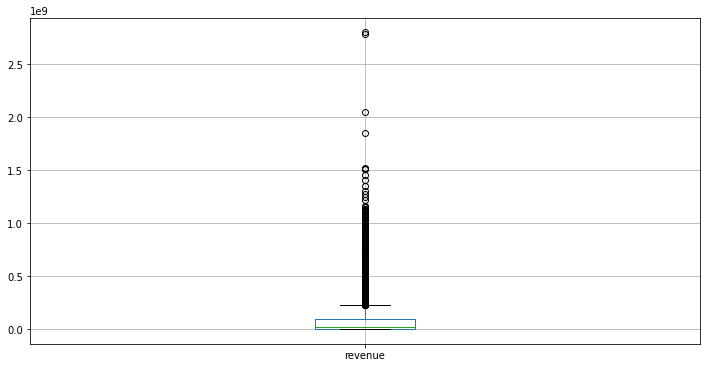

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("revenue")
plt.show()

#### runtime: Tempo de execução do filme em minutos

In [ ]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [ ]:
df["runtime"].dtypes

dtype('float64')

In [ ]:
df["runtime"].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

homepage                3196
tagline                  910
runtime                  514
overview                   3
release_date               1
crew                       0
popularity                 0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
production_countries       0
production_companies       0
cast                       0
revenue                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
budget                     0
dtype: int64

In [ ]:
df[df["runtime"] == 338.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,"[{""cast_id"": 4, ""character"": ""Ilich Ram\u00edr...","[{""credit_id"": ""57352b61c3a3680253000870"", ""de..."


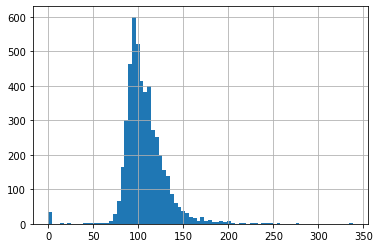

In [ ]:
df["runtime"].hist(bins=80)

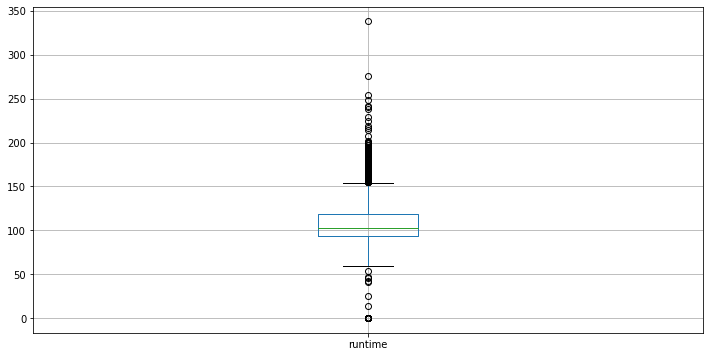

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("runtime")
plt.show()

#### spoken_languages: Idiomas falados no filme

In [ ]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

In [ ]:
df["spoken_languages"].dtypes

dtype('O')

#### status: Status do filme (lançado, para ser lançado, anunciado, etc)

In [ ]:
df["status"].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [ ]:
df["status"].nunique()

3

In [ ]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [ ]:
df["status"].value_counts()

Released           5307
Rumored               5
Post Production       3
Name: status, dtype: int64

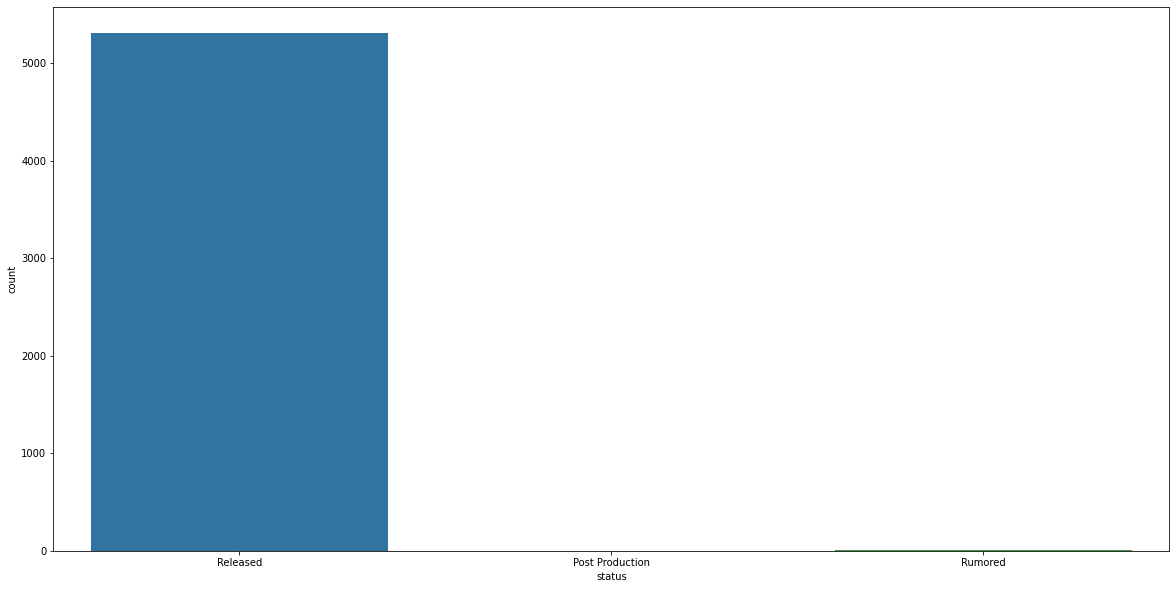

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x="status", data=df)
plt.show()

#### tagline: Tagline do filme

In [ ]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [ ]:
df['tagline'].describe()

count                       4405
unique                      4371
top       Based on a true story.
freq                           4
Name: tagline, dtype: object

#### title: Título oficial do filme

In [ ]:
df['title'].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [ ]:
df["title"].dtypes

dtype('O')

In [ ]:
df["title"].nunique()

5287

In [ ]:
df["title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., '1917', 'Just Mercy', 'Clemency'], dtype=object)

#### vote_average: Avaliação média do filme

In [ ]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [ ]:
df['vote_average'].dtypes

dtype('float64')

In [ ]:
df['vote_average'].describe()

count    5315.000000
mean        6.133471
std         1.184783
min         0.000000
25%         5.600000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

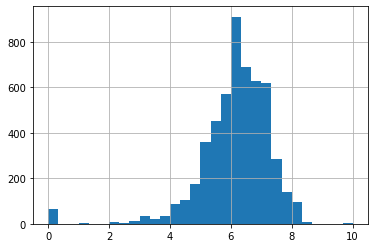

In [ ]:
df['vote_average'].hist(bins=30)

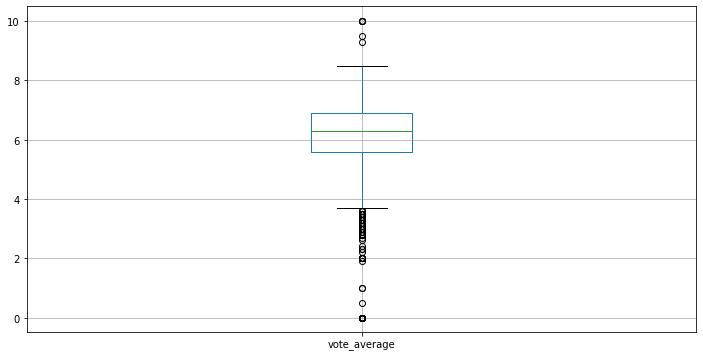

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("vote_average")
plt.show()

In [ ]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]


In [ ]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",NaN,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-01-20,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0,"[{""cast_id"": 3, ""character"": ""Mimi"", ""credit_i...","[{""credit_id"": ""545f8107c3a3686cbb0041fd"", ""de..."
4829,0,[],NaN,190746,[],en,Kri,Kri-Kri fools his friend by pretending to be h...,0.600000,[],[],1913-05-01,0,NaN,[],Released,NaN,Kri Kri's House,0.0,0,"[{'adult': False, 'gender': 0, 'id': 1121474, ...",[]
5008,0,[],NaN,670211,[],en,Power of the Air,An African Missionary shares with a Christian ...,0.605000,"[{'id': 74406, 'logo_path': None, 'name': 'Fiv...",[],2018-10-02,0,NaN,[],Released,The church in America...is in great danger.,Power of the Air,0.0,0,"[{'adult': False, 'gender': 2, 'id': 1754222, ...","[{'adult': False, 'gender': 2, 'id': 122843, '..."
5042,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,637792,[],en,Conundrum: Secrets Among Friends,A story about longtime friends whom have known...,0.943000,[],[],2021-08-28,0,NaN,[],Released,NaN,Conundrum: Secrets Among Friends,0.0,0,"[{'adult': False, '

#### vote_count: Número de votos contabilizados pelo TMDB

In [ ]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [ ]:
df['vote_count'].dtypes

dtype('int64')

In [ ]:
df['vote_count'].describe()

count     5315.000000
mean       809.847601
std       1524.037985
min          0.000000
25%         61.000000
50%        269.000000
75%        852.000000
max      22907.000000
Name: vote_count, dtype: float64

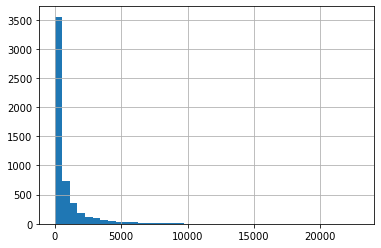

In [ ]:
df['vote_count'].hist(bins=40)

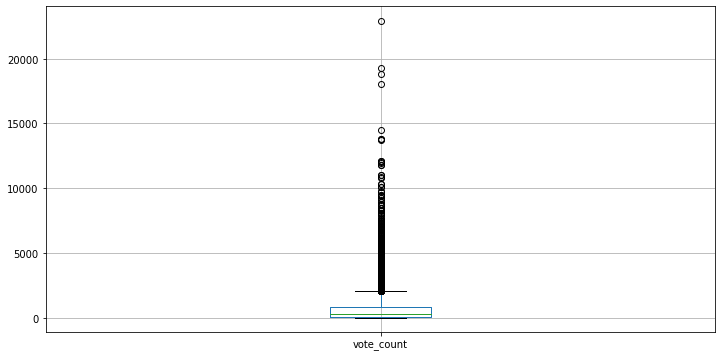

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot("vote_count")
plt.show()

In [ ]:
df[df["vote_count"] == 22907.000000]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4894,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,"[{'id': 2343, 'name': 'magic'}, {'id': 2858, '...",en,Avengers: Infinity War,As the Avengers and their allies have continue...,331.034,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,An entire universe. Once and for all.,Avengers: Infinity War,8.3,22907,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 2, 'id': 37, 'know..."


In [ ]:
q1 = df["vote_count"].quantile(0.25)
q3 = df["vote_count"].quantile(0.75)
IQR = q3 - q1
print(IQR)

791.0


#### cast: Elenco do filme

In [ ]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [ ]:
df["cast"].dtypes

dtype('O')

#### crew: Equipe Técnica

In [ ]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [ ]:
df["crew"].dtypes

dtype('O')

#### Nova fase -  Analisando e interpretando as features (colunas)

#### Calculando o Retorno dos Filmes

In [ ]:
df['budget'] = pd.to_numeric(df["budget"], errors="coerce")
df["budget"] = df["budget"].replace(0, np.nan)

In [ ]:
df["return"]  = df["revenue"]/df["budget"]

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843


In [ ]:
df.head().transpose()

,0,1,2,3,4
budget,2.37e+08,3e+08,2.45e+08,2.5e+08,2.6e+08
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.438,139.083,107.377,112.313,43.927
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [ ]:
df[df["return"] < 1 ]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
13,255000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-03,89289910,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,"[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de...",0.350157
73,175000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",http://www.evanalmighty.com/,2698,"[{""id"": 494, ""name"": ""father son relationship""...",en,Evan Almighty,God contacts Congressman Evan Baxter and tells...,27.082182,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-06-09,173000000,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A comedy of biblical proportions,Evan Almighty,5.3,1151,"[{""cast_id"": 19, ""character"": ""Evan Baxter"", ""...","[{""credit_id"": ""52fe4365c3a36847f805145d"", ""de...",0.988571
83,27000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de...",0.000000
84,175000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,64686,"[{""id"": 233, ""name"": ""japan""}, {""id"": 236, ""na...",en,47 Ronin,"Based on the original 1941 movie from Japan, a...",41.796339,"[{""name"": ""Mid Atlantic Films"", ""id"": 2735}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-12-06,150962475,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,For courage. For loyalty. For honor.,47 Ronin,5.9,1326,"[{""cast_id"": 1001, ""character"": ""Kai"", ""credit...","[{""credit_id"": ""52fe46e4c3a368484e0a98ef"", ""de...",0.862643
135,150000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de...",0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,514921,"[{'id': 3124, 'name': 'cloud'}, {'id': 3497, '...",en,The Aeronauts,"In 1862, daredevil balloon pilot Amelia Wren t...",13.442000,"[{'id': 20580, 'logo_path': '/oRR9EXVoKP9szDkV...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2019-11-04,0,NaN,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Aeronauts,6.8,778,"[{'adult': False, 'gender': 2, 'id': 37632, 'k...","[{'adult': False, 'gender': 1, 'id': 13009, 'k...",0.000000
5300,45000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.richar

In [ ]:
df["return"].describe().round(2)

count       4072.00
mean        2343.42
std       134118.16
min            0.00
25%            0.51
50%            1.88
75%            3.98
max      8500000.00
Name: return, dtype: float64

In [ ]:
df[df["return"] == 8500000.00]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return
4238,1.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.27648,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1936-02-05,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,"[{""cast_id"": 8, ""character"": ""A factory worker...","[{""credit_id"": ""5621aeadc3a3680e1d00a09a"", ""de...",8500000.0


#### Criando uma coluna apenas com o ano

In [ ]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4072 non-null   float64       
 1   genres                5315 non-null   object        
 2   homepage              2119 non-null   object        
 3   id                    5315 non-null   int64         
 4   keywords              5315 non-null   object        
 5   original_language     5315 non-null   object        
 6   original_title        5315 non-null   object        
 7   overview              5312 non-null   object        
 8   popularity            5315 non-null   float64       
 9   production_companies  5315 non-null   object        
 10  production_countries  5315 non-null   object        
 11  release_date          5314 non-null   datetime64[ns]
 12  revenue               5315 non-null   int64         
 13  runtime           

In [ ]:
df.isnull().sum()

budget                  1243
genres                     0
homepage                3196
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                  514
spoken_languages           0
status                     0
tagline                  910
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1243
year                       1
dtype: int64

In [ ]:
df[df["year"].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
4553,NaN,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaT,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,[],[],NaN,NaN


In [ ]:
df.drop(index = 4553, inplace=True)

In [ ]:
df.isnull().sum()

budget                  1242
genres                     0
homepage                3195
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                  514
spoken_languages           0
status                     0
tagline                  909
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
return                  1242
year                       0
dtype: int64

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0


In [ ]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
4238,Modern Times,1936.0,8.500000e+06
3137,Nurse 3-D,2013.0,1.000000e+06
4577,Paranormal Activity,2007.0,1.289039e+04
4582,Tarnation,2003.0,5.330339e+03
4496,The Blair Witch Project,1999.0,4.133333e+03


#### Será que algumas palavras aparecem com mais frequência no Título e no Overview do filme?

In [ ]:
df["title"] = df["title"].astype("str")

In [ ]:
title_corpus = " ".join(df["title"])

In [ ]:
print(title_corpus)

Avatar Pirates of the Caribbean: At World's End Spectre The Dark Knight Rises John Carter Spider-Man 3 Tangled Avengers: Age of Ultron Harry Potter and the Half-Blood Prince Batman v Superman: Dawn of Justice Superman Returns Quantum of Solace Pirates of the Caribbean: Dead Man's Chest The Lone Ranger Man of Steel The Chronicles of Narnia: Prince Caspian The Avengers Pirates of the Caribbean: On Stranger Tides Men in Black 3 The Hobbit: The Battle of the Five Armies The Amazing Spider-Man Robin Hood The Hobbit: The Desolation of Smaug The Golden Compass King Kong Titanic Captain America: Civil War Battleship Jurassic World Skyfall Spider-Man 2 Iron Man 3 Alice in Wonderland X-Men: The Last Stand Monsters University Transformers: Revenge of the Fallen Transformers: Age of Extinction Oz: The Great and Powerful The Amazing Spider-Man 2 TRON: Legacy Cars 2 Green Lantern Toy Story 3 Terminator Salvation Furious 7 World War Z X-Men: Days of Future Past Star Trek Into Darkness Jack the Giant 

In [ ]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_corpus)

In [ ]:
title_wordcloud

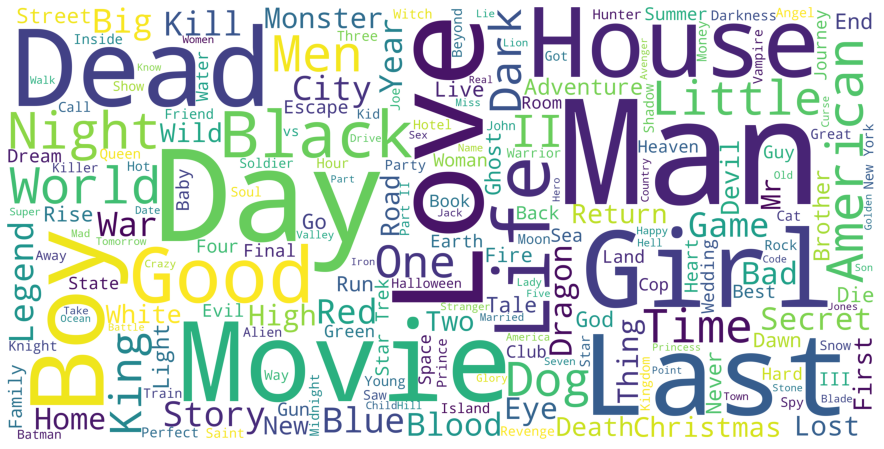

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### E no overview?

In [ ]:
df["overview"] = df["overview"].astype("str")

In [ ]:
overview_corpus = " ".join(df["overview"])

In [ ]:
print(overview_corpus)

 It's the fictional tale of a wayward 9th grader, Ralph (Adam Butcher), who is secretly living on his own while his widowed, hospitalized mother remains immersed in a coma. Frequently in trouble with Father Fitzpatrick (Gordon Pinsent), the principal of his all-boys, Catholic school, Ralph is considered something of a joke among peers until he decides to pull off a miracle that could save his mother, i.e., winning the Boston Marathon.  Coached by a younger priest and former runner, Father Hibbert (Campbell Scott), whose cynicism has been lifted by the boy's pure hope, Ralph applies himself to his unlikely mission, fending off naysayers and getting help along a very challenging path from sundry allies and friends. Over the course of a midsummer night in Fermanagh in 1890, an unsettled daughter of the Anglo-Irish aristocracy encourages her father's valet to seduce her. Young writer, Richard Collier is met on the opening night of his first play by an old lady who begs him to, "Come back t

In [ ]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(overview_corpus)

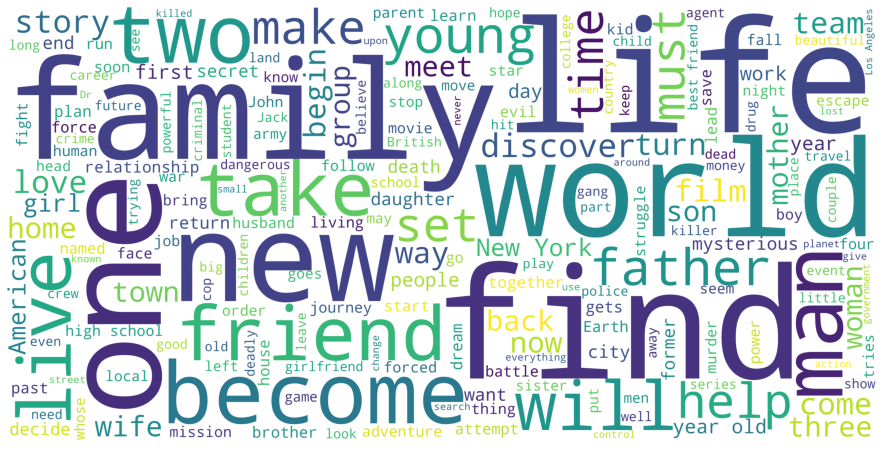

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

#### Quais as principais palavras usadas em filmes com retorna acima de 5

In [ ]:
df_return = df[df["return"] > 5]

In [ ]:
df_return.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
7,280000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",5.019299,2015.0
12,200000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""JM"", ""name"": ""Jamaica""}, {""is...",2006-06-20,1065659812,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,"[{""cast_id"": 37, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""52fe4211c3a36847f8001873"", ""de...",5.328299,2006.0
16,220000000.0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",6.907081,2012.0
25,200000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[{""cast_id"": 20, ""character"": ""Rose DeWitt Buk...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",9.225171,1997.0


In [ ]:
df_return["title"] = df["title"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
title_c = " ".join(df_return["title"])

In [ ]:
title_wordcloud_return_5 = WordCloud(stopwords = STOPWORDS, background_color = "white", height=2000, width=4000).generate(title_c)

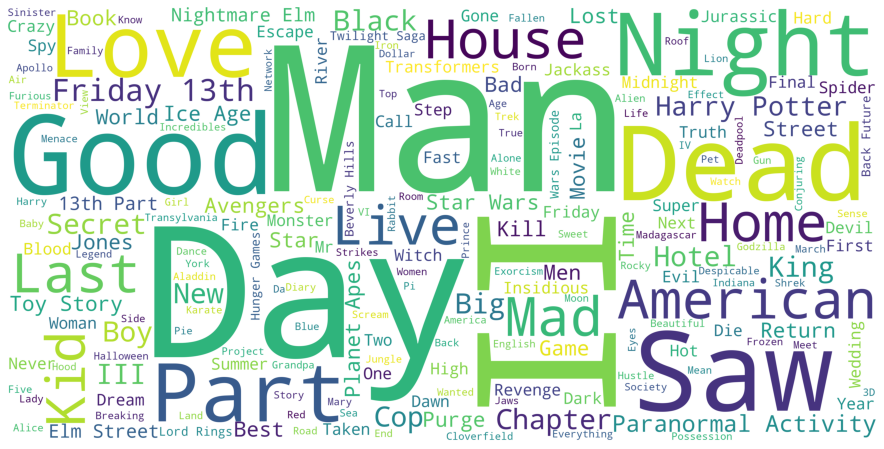

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud_return_5)
plt.axis('off')
plt.show()

#### Quais são os idiomais mais representativos?

In [ ]:
lang_df = pd.DataFrame(df["original_language"].value_counts())
lang_df["language"] = lang_df.index 
lang_df.columns = ["number", 'language']
lang_df.head()

,number,language
en,5000,en
fr,73,fr
es,36,es
zh,28,zh
de,28,de


In [ ]:
df["original_language"].nunique()

37

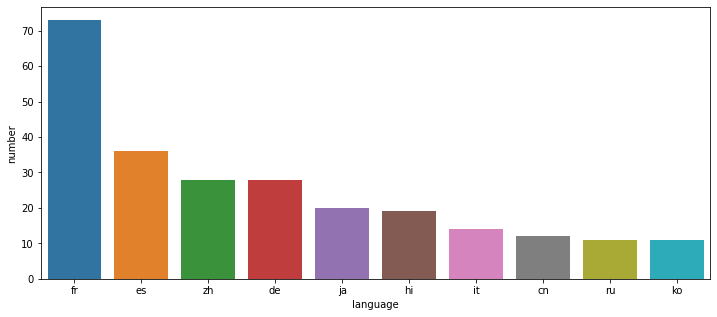

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x = "language", y = "number", data=lang_df[1:11])

#### Popularidade

In [ ]:
df["popularity"].describe()

count    5314.000000
mean       25.150445
std        84.413174
min         0.000372
25%         5.263689
50%        13.737120
75%        28.972093
max      3799.665000
Name: popularity, dtype: float64

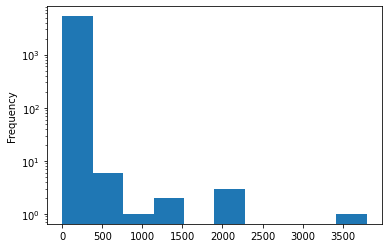

In [ ]:
df["popularity"].plot(logy=True, kind='hist')

In [ ]:
df[["original_title", "popularity", "year"]].sort_values("popularity", ascending=False).head(20)

,original_title,popularity,year
5020,Halloween,3799.665000,2021.0
5009,Venom,2162.920000,2018.0
5139,Family,2118.999000,2021.0
5254,The Addams Family,2118.999000,2021.0
4983,Kin,1465.021000,2021.0
5133,After,1452.437000,2021.0
546,Minions,875.581305,2015.0
95,Interstellar,724.247784,2014.0
788,Deadpool,514.569956,2016.0
5131,Little,511.515000,2021.0


#### Vote Count

In [ ]:
df[["title", 'vote_count', 'year']].sort_values("vote_count", ascending=False).head(10)

,title,vote_count,year
4894,Avengers: Infinity War,22907,2018.0
5143,Avengers: Endgame,19318,2019.0
5246,Joker,18845,2019.0
4833,Black Panther,18031,2018.0
5197,The Lion King,14520,1994.0
4908,Deadpool 2,13833,2018.0
5030,Bohemian Rhapsody,13778,2018.0
96,Inception,13752,2010.0
4872,Ready Player One,12068,2018.0
5104,Captain Marvel,12067,2019.0


#### vote average

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


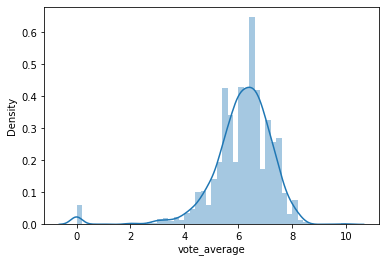

In [ ]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

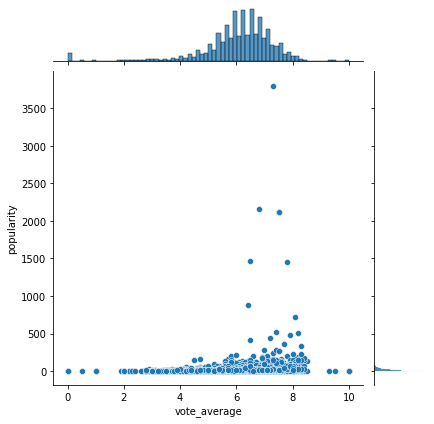

In [ ]:
sns.jointplot(x='vote_average', y="popularity", data=df)

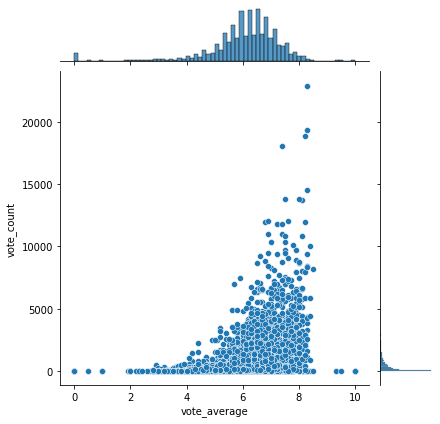

In [ ]:
sns.jointplot(x='vote_average', y="vote_count", data=df)

#### Quais meses são lançados mais filmes

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012.0


In [ ]:
df['month'] = pd.DatetimeIndex(df["release_date"]).month

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,return,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009.0,12
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007.0,5
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015.0,10
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012.0,7
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012.0,3


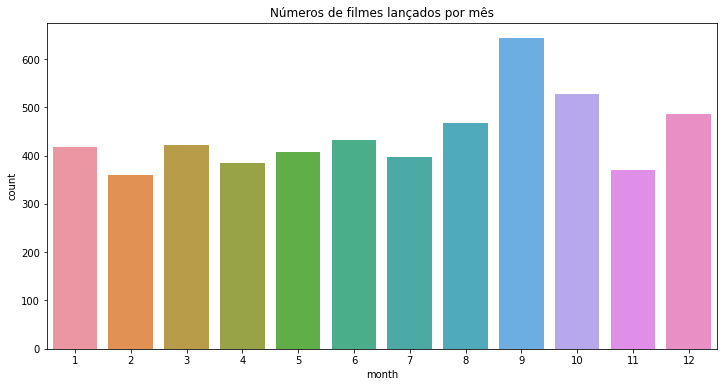

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Números de filmes lançados por mês")
sns.countplot(x="month", data=df)

(0.0, 12.0)

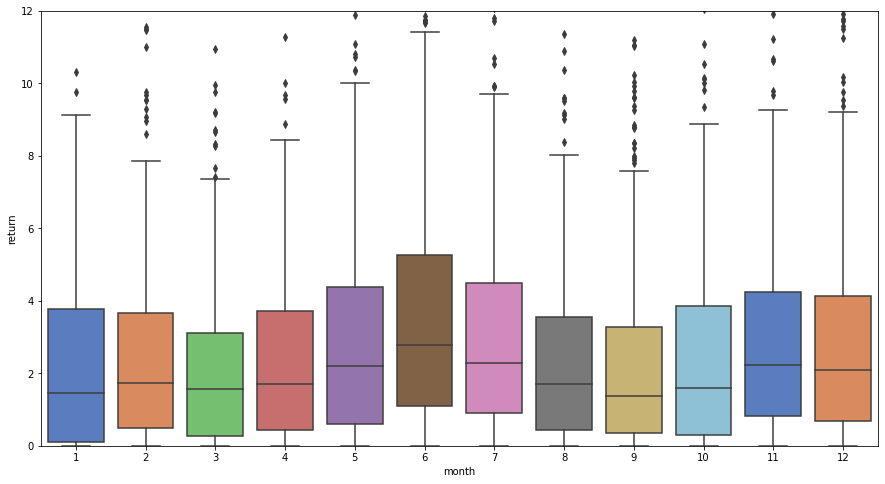

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.boxplot(x="month", y='return', data=df[df["return"].notnull()], palette="muted", ax=ax)
ax.set_ylim([0, 12])

#### número de filmes lançados por ano

In [ ]:
year_count = df.groupby('year')["original_title"].count()

In [ ]:
year_count

year
1913.0      1
1916.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2017.0     23
2018.0    237
2019.0    215
2020.0      3
2021.0     14
Name: original_title, Length: 95, dtype: int64

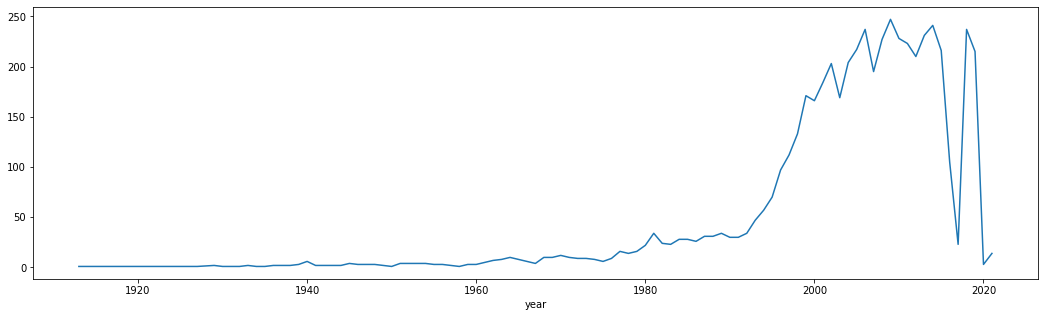

In [ ]:
plt.figure(figsize=(18,5))
year_count.plot()

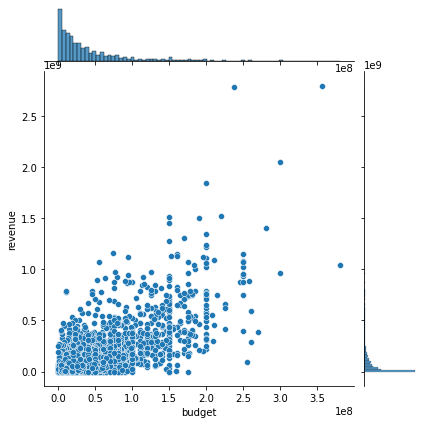

In [ ]:
sns.jointplot(x='budget', y="revenue", data=df[df["return"].notnull()])